# Tutorial 4: Classification

---

In this notebook, we will try to classify the galaxy classes using two different ways:
   1. Unsupervised learning
   2. Supervised learning

In [1]:
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt # for plotting§      
from sklearn.decomposition import PCA
import scipy.stats as st
import pandas as pd

Next let us recall the data

In [2]:
%store -r auto_df_train 
%store -r auto_df_test
%store -r labels_train
%store -r labels_test
%store -r classes
%store -r pca_sample

---

### Unsupervised Learning

In [3]:
from itertools import permutations

permutations('1234', repeat=4)

TypeError: 'repeat' is an invalid keyword argument for permutations()

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=4)
kmeans.fit(auto_df_train)
pred = kmeans.predict(auto_df_test)

In [ ]:
# list(pred)

In [8]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from scipy.optimize import linear_sum_assignment as linear_assignment

In [12]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
print()
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

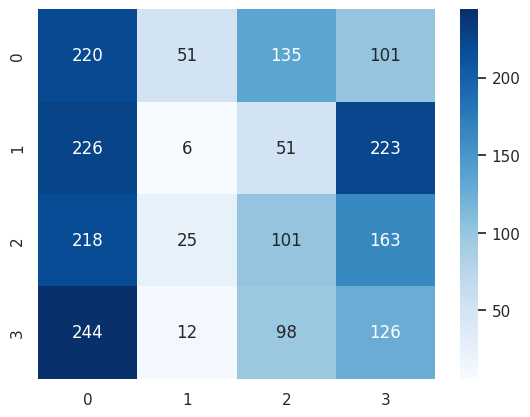

(array([0, 1, 2, 3]), array([2, 3, 1, 0]))
[1, 3]


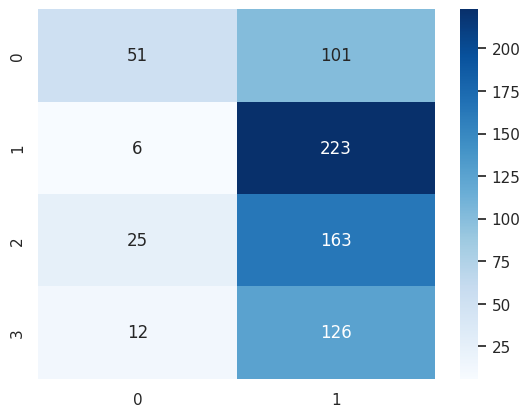

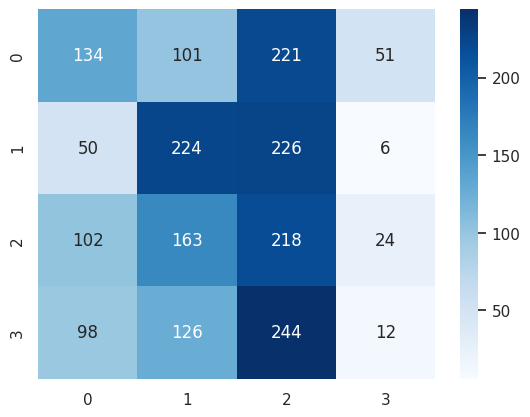

(array([0, 1, 2, 3]), array([0, 1, 3, 2]))
[1, 1]


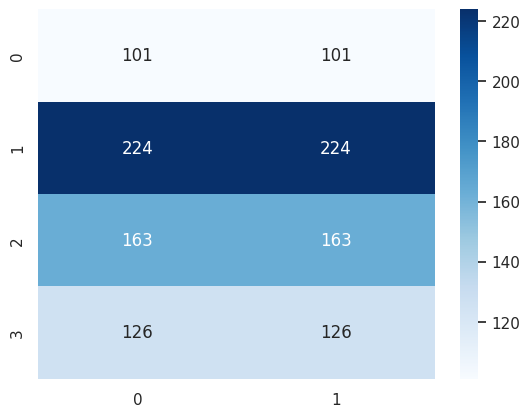

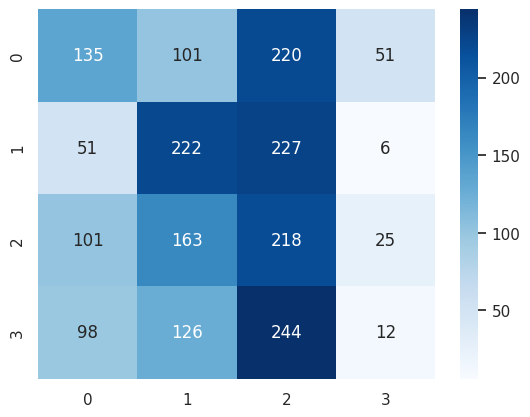

(array([0, 1, 2, 3]), array([0, 1, 3, 2]))
[1, 1]


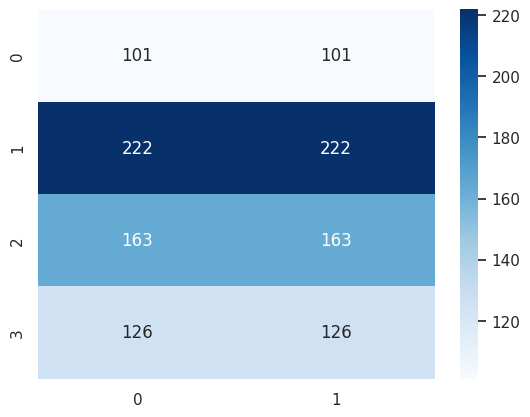

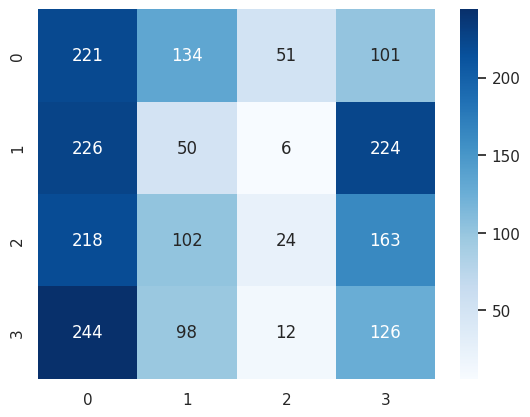

(array([0, 1, 2, 3]), array([1, 3, 2, 0]))
[1, 3]


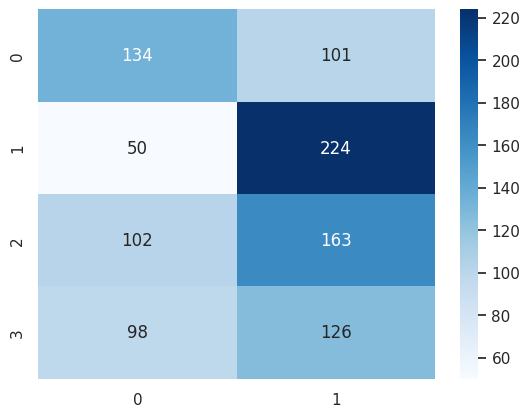

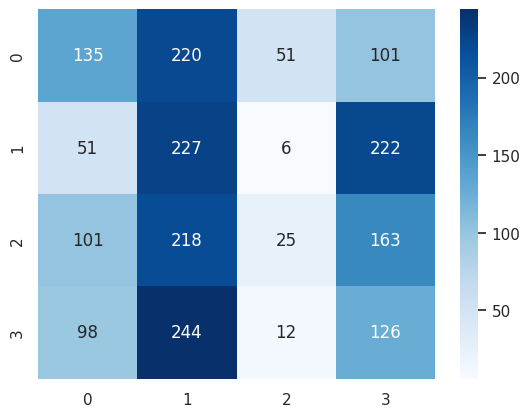

(array([0, 1, 2, 3]), array([0, 3, 2, 1]))
[1, 3]


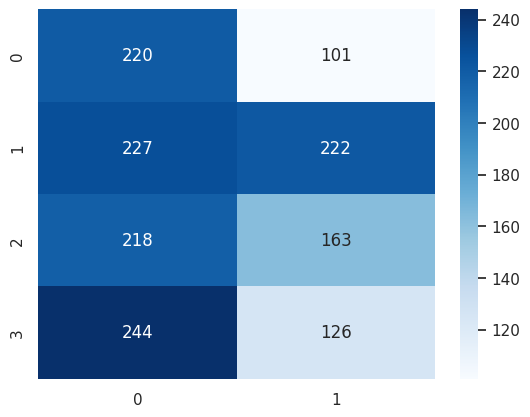

In [20]:
# [6589,4598,2489,9434,7984,1238,6468,5165,3246,8646]
import seaborn as sns; sns.set()

for seed in [6589,4598,2489,9434,7984]:
    kmeans = KMeans(init="k-means++", n_clusters=4, random_state=seed)
    kmeans.fit(auto_df_train)
    pred = kmeans.predict(auto_df_test)
    cm = confusion_matrix(labels_test, pred)

    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()
    indexes = linear_assignment(_make_cost_m(cm))
    print(indexes)
    js = [e[1] for e in sorted(np.asarray(indexes), key=lambda x: x[0])]
    print(js)
    cm2 = cm[:, js]
    ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
    plt.show()

In [34]:
def _make_cost_m(cm):
    s = np.max(cm)
    # print(cm, s)
    # print((- cm + s))
    return (- cm + s)

def labelMap(vol, pred):
    cm = confusion_matrix(vol, pred)
    indexes = linear_assignment(_make_cost_m(cm))
    print(indexes)
    indexes = np.asarray(indexes)
    # print(indexes)
    return indexes[1]
    
def convertLabels(lmap, pred):
    conv_preds = []
    for i in range(len(pred)):
        conv_preds.append(lmap[pred[i]])
    return np.array(conv_preds)

In [35]:
colors = ['dodgerblue', 'orange', 'limegreen', 'magenta']


In [39]:
for seed in [6589,4598,2489,9434,7984,1238,6468,5165,3246,8646]:
    kmeans = KMeans(init="k-means++", n_clusters=4, random_state=seed)
    kmeans.fit(auto_df_train)
    pred = kmeans.predict(auto_df_test)
    total_report = {}
    print(labels_test)
    cm = confusion_matrix(labels_test, pred)

    # ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    # plt.show()
    
    lmap = labelMap(np.array(labels_test), pred)
    print(lmap)
    conv_preds = convertLabels(np.array(lmap), np.array(pred))
    print(conv_preds)
    question_report = precision_recall_fscore_support(y_pred=conv_preds, y_true=labels_test, average='weighted')
    cm = confusion_matrix(y_pred=conv_preds, y_true=labels_test)
    # ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    # plt.show()
    
    print(question_report)
    print(cm)
    total_report["precision"] = question_report[0]
    total_report['recall'] = question_report[1]
    total_report['f1'] = question_report[2]



    print('--------------------------------------------------------------')


tensor([3, 2, 1,  ..., 0, 1, 1])
(array([0, 1, 2, 3]), array([2, 3, 1, 0]))
[2 3 1 0]
[2 2 0 ... 2 2 0]
(0.16678245509311906, 0.191, 0.16282858923264693, None)
[[101 135 220  51]
 [223  51 226   6]
 [163 101 218  25]
 [126  98 244  12]]
--------------------------------------------------------------
tensor([3, 2, 1,  ..., 0, 1, 1])
(array([0, 1, 2, 3]), array([0, 1, 3, 2]))
[0 1 3 2]
[3 3 1 ... 3 3 1]
(0.3106024088500351, 0.313, 0.282048812676804, None)
[[134 101  51 221]
 [ 50 224   6 226]
 [102 163  24 218]
 [ 98 126  12 244]]
--------------------------------------------------------------
tensor([3, 2, 1,  ..., 0, 1, 1])
(array([0, 1, 2, 3]), array([0, 1, 3, 2]))
[0 1 3 2]
[3 3 1 ... 3 3 1]
(0.3125067752037138, 0.313, 0.28261741718916256, None)
[[135 101  51 220]
 [ 51 222   6 227]
 [101 163  25 218]
 [ 98 126  12 244]]
--------------------------------------------------------------
tensor([3, 2, 1,  ..., 0, 1, 1])
(array([0, 1, 2, 3]), array([1, 3, 2, 0]))
[1 3 2 0]
[1 1 0 ... 1 1 0]


In [30]:
report_df = pd.DataFrame.from_dict(total_report, orient='index')


In [8]:
report_df.head

<bound method NDFrame.head of                0
precision  0.667
recall     0.667
f1         0.667>

Like, are those results are even normal??
the variations are just too big, and also (can't remmeber)

### Supervised learning

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd = SGDClassifier()

sgd.fit(auto_df_train, labels_train)

SGDClassifier()

In [29]:
def plot_confusion_matrix(predictions, input_data, input_labels, classes):
    
    # Compute the confusion matrix by comparing the test labels (ds.test_labels) with the test predictions
    cm = metrics.confusion_matrix(input_labels, predictions, labels=[0, 1, 2, 3])
    cm = cm.astype('float')

    # Normalize the confusion matrix results. 
    cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.matshow(cm_norm)

    plt.title('Confusion matrix', y=1.08)
    
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(classes)
    
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(classes)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    fmt = '.2f'
    thresh = cm_norm.max() / 2.
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            ax.text(j, i, format(cm_norm[i, j], fmt), 
                    ha="center", va="center", 
                    color="white" if cm_norm[i, j] < thresh else "black")
    plt.show()

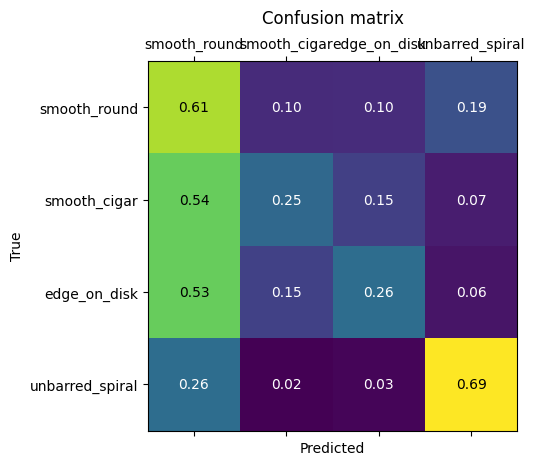

In [30]:
y_predict = sgd.predict(auto_df_test)

plot_confusion_matrix(y_predict, auto_df_test, labels_test, classes)


In [ ]:
print()

Question